## Project: Analysis of TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#data_wrangle">Data Wrangling</a></li>
<li><a href="#data_clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#references">References</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset has been sourced from Kaggle and contains information on over 10,000 movies, including budget, revenue, imdb ratings, directors eand more. The aim of this investigation is to conduct exploratiory analysis to uncover associations and dependencies to answer questions such as:

1. Most profitable genre 
2. Factors on which the revenue is dependent on 
3. Properties affecting the popularity of the movie

In [1]:
# Importing packages to be used

import pandas as pd
from pandas import Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='data_wrangle'></a>
## Data Wrangling

1. Load the data.
2. Inspect the raw data to check for null values, duplicate rows, column renaming, data types.
3. Assess the data to draw meaningful insights


In [2]:
# Load your data and print out a few lines.

dataset_movies = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
df_movie = pd.read_csv(dataset_movies)
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Number of sample and columns 
df_movie.shape

(10866, 21)

In [4]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
df_movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#Duplicated rows
sum(df_movie.duplicated())

1

In [7]:
df_movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df_movie.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

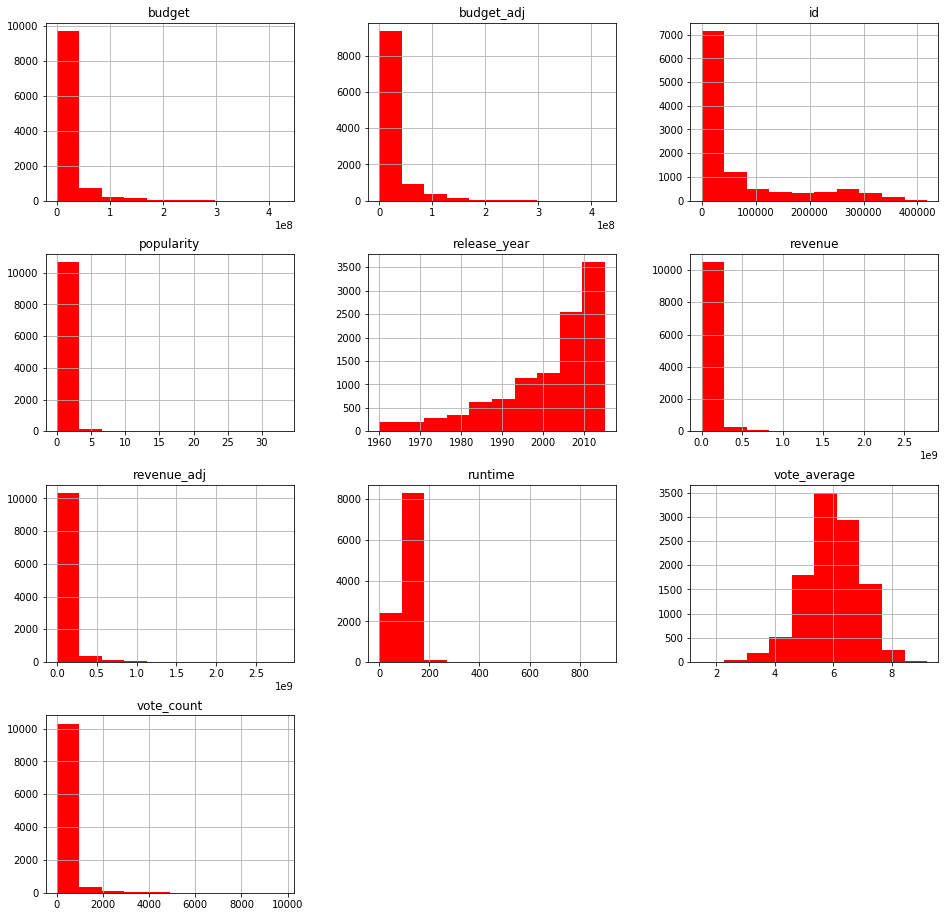

In [9]:
df_movie.hist(color='red',figsize=(16, 16));

### Observations:
1. There are 21 columns and 10866 rows
2. The data is relatively clean with only one duplicated value and some null values
3. There are a few columns that are not required for our analysis so we will remove them while cleaning the data
4. Most of the graphs are skewed to the right implying that a few larger values have a great impact on the data set by bringing the mean upwards
5. The column 'vote_average' looks like imdb rating

<a id='data_clean'></a>
## Data Cleaning

In [10]:
# Remove the columns that are not required for analysis

df_movie.drop(['imdb_id', 'revenue', 'budget', 'homepage', 'tagline', 'keywords', 'production_companies', 'overview', 'release_date', 'vote_count'], axis=1, inplace=True)

In [11]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [12]:
# Renamed the 'vote_average' column

df_movie = df_movie.rename(columns={'vote_average':'imdb_score'})
df_movie[0:10]

,id,popularity,original_title,cast,director,runtime,genres,imdb_score,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,8.0,2015,1.609999e+08,7.854116e+08


In [13]:
# Remove the duplicated row

df_movie = df_movie.drop_duplicates()

In [14]:
#Check for duplicated rows after teh removal

sum(df_movie.duplicated())

0

In [15]:
df_movie.shape

(10865, 11)

In [16]:
#Replacing all zeros with NaN

df_movie = df_movie.replace(to_replace=0, value=np.nan)

In [17]:
#Dropping rows with null values

df_movie = df_movie.dropna()

In [18]:
#Check again for any null values

df_movie.isnull().sum().any()

False

In [19]:
df_movie.describe()

,id,popularity,runtime,imdb_score,release_year,budget_adj,revenue_adj
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03
mean,39885.146791,1.192933,109.217459,6.168693,2001.258249,4.429360e+07,1.372313e+08
std,67248.890597,1.475622,19.914141,0.794697,11.285642,4.481360e+07,2.162018e+08
min,5.000000,0.001117,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6072.000000,0.463337,95.000000,5.700000,1995.000000,1.316623e+07,1.843023e+07
50%,11313.000000,0.798582,106.000000,6.200000,2004.000000,3.005030e+07,6.181393e+07
75%,38575.000000,1.374300,119.000000,6.700000,2010.000000,6.076720e+07,1.634115e+08
max,417859.000000,32.985763,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [20]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 11 columns):
id                3849 non-null int64
popularity        3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
runtime           3849 non-null float64
genres            3849 non-null object
imdb_score        3849 non-null float64
release_year      3849 non-null int64
budget_adj        3849 non-null float64
revenue_adj       3849 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 360.8+ KB


### Save the clean data in a new csv file before the analysis

In [21]:
df_movie.to_csv('clean_TMDb.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [22]:
# Download the cleaned data

df_movie = pd.read_csv('clean_TMDb.csv')
df_movie.describe()

,id,popularity,runtime,imdb_score,release_year,budget_adj,revenue_adj
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03
mean,39885.146791,1.192933,109.217459,6.168693,2001.258249,4.429360e+07,1.372313e+08
std,67248.890597,1.475622,19.914141,0.794697,11.285642,4.481360e+07,2.162018e+08
min,5.000000,0.001117,15.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,6072.000000,0.463337,95.000000,5.700000,1995.000000,1.316623e+07,1.843023e+07
50%,11313.000000,0.798582,106.000000,6.200000,2004.000000,3.005030e+07,6.181393e+07
75%,38575.000000,1.374300,119.000000,6.700000,2010.000000,6.076720e+07,1.634115e+08
max,417859.000000,32.985763,338.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### 1. Relationship between popularity of a movie and revenue

#### Top 10 movies with high revenues

In [23]:
director_revenue = df_movie.sort_values(by='revenue_adj', ascending=False)
top_ten_movie = director_revenue[:11]
top_ten_movie

,id,popularity,original_title,cast,director,runtime,genres,imdb_score,release_year,budget_adj,revenue_adj
344,19995,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,7.1,2009,2.408869e+08,2.827124e+09
325,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,7.9,1977,3.957559e+07,2.789712e+09
1764,597,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,7.3,1997,2.716921e+08,2.506406e+09
3796,9552,2.010733,The Exorcist,Linda Blair|Max von Sydow|Ellen Burstyn|Jason ...,William Friedkin,122.0,Drama|Horror|Thriller,7.2,1973,3.928928e+07,2.167325e+09
3538,578,2.563191,Jaws,Roy Scheider|Robert Shaw|Richard Dreyfuss|Lorr...,Steven Spielberg,124.0,Horror|Thriller|Adventure,7.3,1975,2.836275e+07,1.907006e+09
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
3195,601,2.900556,E.T. the Extra-Terrestrial,Henry Thomas|Drew Barrymore|Robert MacNaughton...,Steven Spielberg,115.0,Science Fiction|Adventure|Family|Fantasy,7.2,1982,2.372625e+07,1.791694e+09
2862,1642,1.136610,The Net,Sandra Bullock|Jeremy Northam|Dennis Miller|We...,Irwin Winkler,114.0,Crime|Drama|Mystery|Thriller|Action,5.6,1995,3.148127e+07,1.583050e+09
3626,12230,2.631987,One Hundred and One Dalmatians,Rod Taylor|J. Pat O'Malley|Betty Lou Gerson|Ma...,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79.0,Adventure|Animation|Comedy|Family,6.6,1961,2.917944e+07,1.574815e+09
1486,24428,7.637767,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143.0,Science Fiction|Action|Adventure,7.3,2012,2.089437e+08,1.443191e+09


#### Below is the entire dataset grouped by 'director'

In [24]:
director_mean_df = df_movie.groupby(['director']).mean()
director_mean_df.sort_values('popularity', ascending=False)[:10]

,id,popularity,runtime,imdb_score,release_year,budget_adj,revenue_adj
director,,,,,,,
Colin Trevorrow,109864.500,16.696886,104.500,6.6000,2013.500,6.935612e+07,6.981261e+08
Joe Russo|Anthony Russo,100402.000,12.971027,136.000,7.6000,2014.000,1.565855e+08,6.583651e+08
Chad Stahelski|David Leitch,245891.000,11.422751,101.000,7.0000,2014.000,1.842182e+07,7.252661e+07
Don Hall|Chris Williams,177572.000,8.691294,102.000,7.8000,2014.000,1.519800e+08,6.006485e+08
Morten Tyldum,205596.000,8.110711,113.000,8.0000,2014.000,1.289527e+07,2.151261e+08
Christopher Nolan,29439.375,7.695094,141.875,7.6375,2007.125,1.268367e+08,5.205327e+08
Kyle Balda|Pierre Coffin,211672.000,7.404165,91.000,6.5000,2015.000,6.807997e+07,1.064192e+09
James Gunn,81736.000,7.377549,108.500,7.2500,2012.000,7.954274e+07,3.563076e+08
MÃ¥ns MÃ¥rlind|BjÃ¶rn Stein,52520.000,7.031452,88.000,6.0000,2012.000,6.648210e+07,1.257461e+08


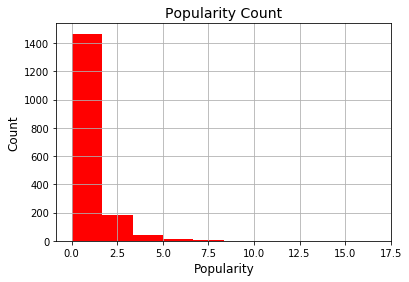

In [25]:
director_mean_df['popularity'].hist(color='red');
plt.xlabel('Popularity', fontsize=12);
plt.ylabel('Count', fontsize=12);
plt.title('Popularity Count', fontsize=14);

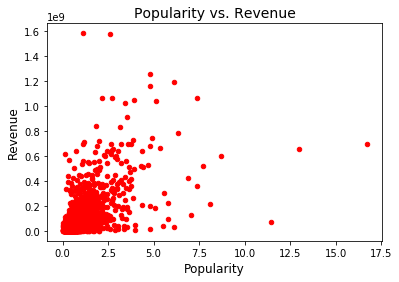

In [26]:
director_mean_df.plot(x='popularity', y='revenue_adj', kind='scatter', color='Red');
plt.xlabel('Popularity', fontsize=12);
plt.ylabel('Revenue', fontsize=12);
plt.title('Popularity vs. Revenue', fontsize=14);

### Observations:

1. As expected there is a positive correlation between revenue and popularity of a movie. 
2. As per the graph 'Popularity Count' indicates that most directors are not very popular and their popularity lies between 0 and 1.
3. The popularity of the top movies in terms of revenue is significantly low compared to the popularity of the movie 'Jurassic World'

### 2. How does the runtime effect the popularity of movies?

In [27]:
df_movie.sort_values('popularity', ascending=False)[:10]

,id,popularity,original_title,cast,director,runtime,genres,imdb_score,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
160,157336,24.949134,Interstellar,Matthew McConaughey|Jessica Chastain|Anne Hath...,Christopher Nolan,169.0,Adventure|Drama|Science Fiction,8.0,2014,1.519800e+08,5.726906e+08
161,118340,14.311205,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,James Gunn,121.0,Action|Science Fiction|Adventure,7.9,2014,1.565855e+08,7.122911e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
162,100402,12.971027,Captain America: The Winter Soldier,Chris Evans|Scarlett Johansson|Sebastian Stan|...,Joe Russo|Anthony Russo,136.0,Action|Adventure|Science Fiction,7.6,2014,1.565855e+08,6.583651e+08
325,11,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,7.9,1977,3.957559e+07,2.789712e+09
163,245891,11.422751,John Wick,Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...,Chad Stahelski|David Leitch,101.0,Action|Thriller,7.0,2014,1.842182e+07,7.252661e+07
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
164,131631,10.739009,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...,Francis Lawrence,123.0,Science Fiction|Adventure|Thriller,6.6,2014,1.151364e+08,6.927528e+08


In [28]:
df_movie['runtime'].describe()

count    3849.000000
mean      109.217459
std        19.914141
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

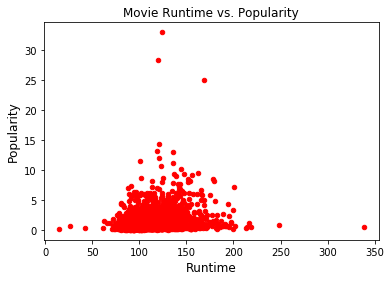

In [29]:
df_movie.plot(x='runtime', y='popularity', kind='scatter', title='Movie Runtime vs. Popularity', color='Red');
plt.xlabel('Runtime', fontsize=12);
plt.ylabel('Popularity', fontsize=12);

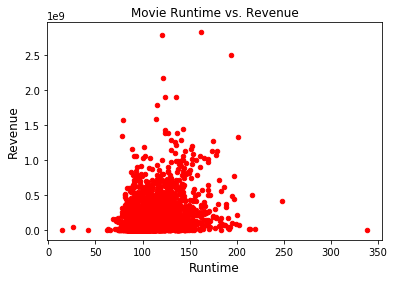

In [30]:
df_movie.plot(x='runtime', y='revenue_adj', kind='scatter', title='Movie Runtime vs. Revenue', color='Red');
plt.xlabel('Runtime', fontsize=12);
plt.ylabel('Revenue', fontsize=12);

### Observations:
The revenue graph suggests that movies with runtime between the value 95.0 and 200 have revenue above USD 1,000,000,000 and those movies are also popular among the masses

### 3. The top 5 revenue producing genres

#### Split the genre column for the analysis

In [31]:
s = df_movie['genres'].str.split('|').apply(Series, 1).stack()
s.index = s.index.droplevel(-1) # to line up with df_movie's index
s.name = 'genres'
del df_movie['genres']
df_movie = df_movie.join(s)
df_movie.head()

,id,popularity,original_title,cast,director,runtime,imdb_score,release_year,budget_adj,revenue_adj,genres
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,7.1,2015,1.379999e+08,3.481613e+08,Action


In [32]:
df_movie.shape

(10290, 11)

In [33]:
df_movie['genres'].nunique()

20

In [34]:
df_movie['genres'].value_counts()

Drama              1753
Comedy             1357
Thriller           1203
Action             1085
Adventure           749
Romance             666
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               134
History             129
War                 119
Western              52
Documentary          31
Foreign              12
TV Movie              1
Name: genres, dtype: int64

In [35]:
genre_revenue_df = (pd.DataFrame(df_movie.groupby('genres').revenue_adj.sum()))
sort_genre_revenue = genre_revenue_df.sort_values('revenue_adj', ascending=False)


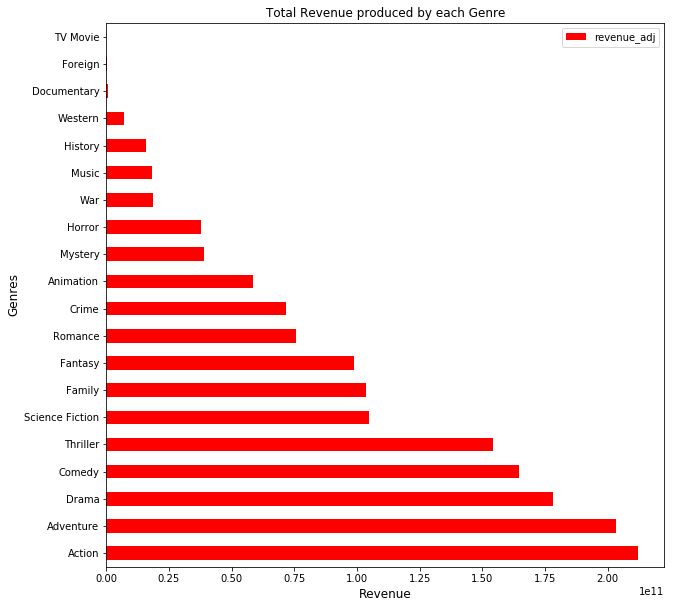

In [36]:
sort_genre_revenue.plot(kind='barh', width=0.5, color='red', figsize=(10, 10));
plt.title('Total Revenue produced by each Genre')
plt.xlabel('Revenue', fontsize=12);
plt.ylabel('Genres', fontsize=12);
plt.show;

In [37]:
genre_popularity_df = (pd.DataFrame(df_movie.groupby('genres').popularity.mean()))
genre_popularity_df.sort_values('popularity', ascending=False)

,popularity
genres,
Science Fiction,1.873294
Adventure,1.867693
Fantasy,1.754315
Animation,1.710622
Action,1.567116
Family,1.459043
Thriller,1.259835
War,1.246129
Mystery,1.142613


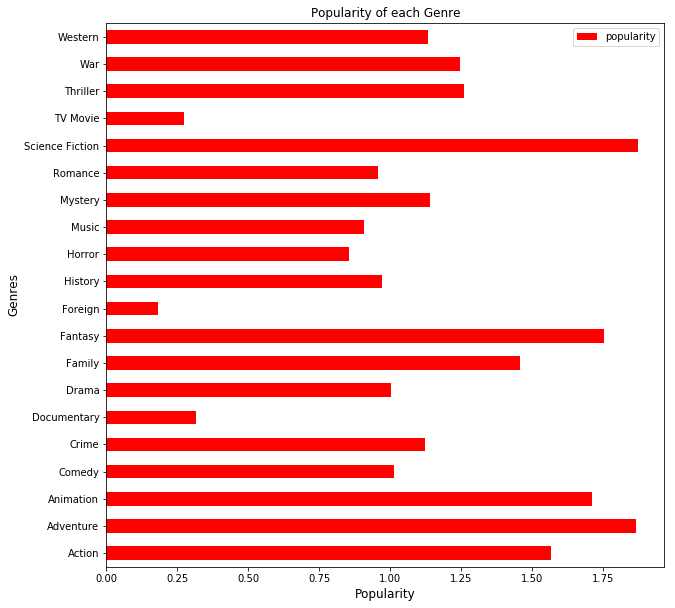

In [38]:
genre_popularity_df.plot(kind='barh', width=0.5, color='red', figsize=(10, 10));
plt.title('Popularity of each Genre')
plt.xlabel('Popularity', fontsize=12);
plt.ylabel('Genres', fontsize=12);
plt.show;

In [39]:
genre_runtime_df = (pd.DataFrame(df_movie.groupby('genres').runtime.mean()))
genre_runtime_df.sort_values('runtime', ascending=False)

,runtime
genres,
History,142.286822
War,131.075630
Western,126.846154
Foreign,120.666667
Drama,115.909869
Adventure,112.615487
Mystery,112.081395
Action,111.663594
Crime,111.552995


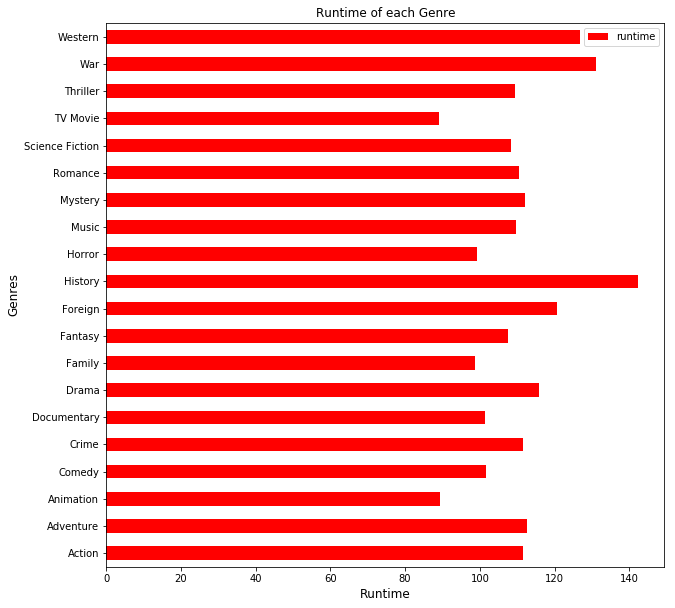

In [40]:
genre_runtime_df.plot(kind='barh', width=0.5, color='red', figsize=(10, 10));
plt.title('Runtime of each Genre')
plt.xlabel('Runtime', fontsize=12);
plt.ylabel('Genres', fontsize=12);
plt.show;

### Observations:

1.The top 5 genres with high revenues are
    - Action
    - Adventure
    - Drama
    - Comedy
    - Thriller
2.From the above list, it can be seen that of the top 5 genres only Action and Adventure are among the top 5 popular genres. Drama, Comedy and Thriller rank 14, 11 and 8
3.This implies that popularity of a genre does not have a significant effect on the revenue

### 5. Revenue by IMDB score

### Add a new column 'rating_scale' to have clear categories of imdb score

In [41]:
bin_edges = ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
bin_names = (['Ridiculous','Awful', 'Bad', 'eeh', 'Average', 'Good', 'Good+', 'Very Good', 'Excellent'])
df_movie['rating_scale'] = pd.cut(df_movie['imdb_score'], bins=bin_edges, labels=bin_names, include_lowest=True)
df_movie.head()

,id,popularity,original_title,cast,director,runtime,imdb_score,release_year,budget_adj,revenue_adj,genres,rating_scale
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,6.5,2015,1.379999e+08,1.392446e+09,Action,Good
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,6.5,2015,1.379999e+08,1.392446e+09,Adventure,Good
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction,Good
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,6.5,2015,1.379999e+08,1.392446e+09,Thriller,Good
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,7.1,2015,1.379999e+08,3.481613e+08,Action,Good+


In [42]:
df_movie['imdb_score'].describe()

count    10290.000000
mean         6.156239
std          0.789756
min          2.200000
25%          5.700000
50%          6.200000
75%          6.700000
max          8.400000
Name: imdb_score, dtype: float64

### Observations:

1. The table above suggests that most revenue was produced by movies with IMDB rating between 7 and 8
2. An interesting deduction from the table is the release year which indicates that the movies produced in the last decade have lower imdb ratings. This requires an anlysis of the revenue produced in the last decade and has it been increasing or decaresing with every year.

### 4. Check for relation between rating_scale and popularity

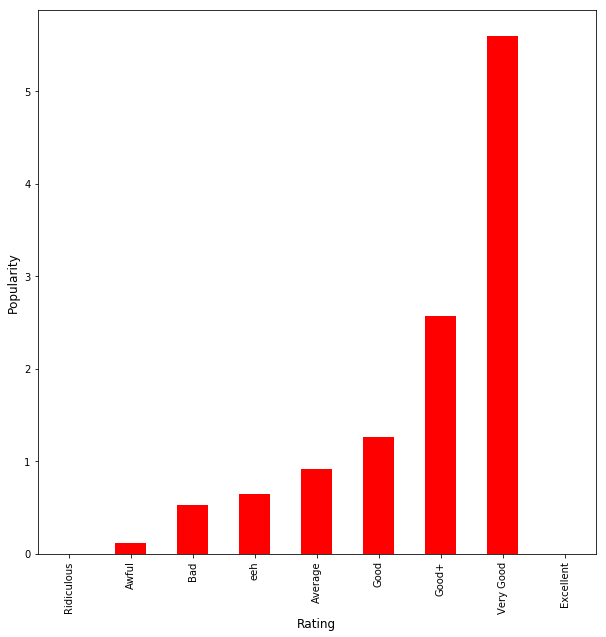

In [43]:
rating_df = df_movie.groupby('rating_scale')['popularity'].mean()
rating_df.plot(kind='bar', width=0.5, color='red', figsize=(10, 10));
plt.xlabel('Rating', fontsize=12);
plt.ylabel('Popularity', fontsize=12);

### Observations:

The movies ranking high on popularity fall between 7 and 8 on the rating scale and the question that requires further investigation is that why the movies with imdb rating above 9 are low on popularity. 

### 5. Understand the relation between imdb score and revenue

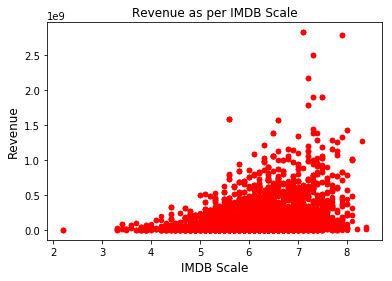

In [44]:
df_movie.plot(x='imdb_score', y='revenue_adj', kind='scatter', title='Revenue as per IMDB Scale', color='Red');
plt.xlabel('IMDB Scale', fontsize=12);
plt.ylabel('Revenue', fontsize=12);

### Observations:

1. The revenue as per the IMDB scale suggests that the data is more skewed to the left with high revenue producing movies having an IMDB score between 6.5 and 8.3
2. The the correaltion between popularity and revenue not only is positive but as expected there is a strong dependency on popularity for revenue
3. While the correlation between imdb score and revenue is positive, it is not a significant number

In [45]:
df_movie.corr(method='pearson')

,id,popularity,runtime,imdb_score,release_year,budget_adj,revenue_adj
id,1.000000,0.205898,-0.033027,0.017882,0.475232,-0.093637,-0.066287
popularity,0.205898,1.000000,0.209704,0.324335,0.189948,0.393178,0.546107
runtime,-0.033027,0.209704,1.000000,0.339506,-0.117776,0.323535,0.278098
imdb_score,0.017882,0.324335,0.339506,1.000000,-0.124584,0.051624,0.283628
release_year,0.475232,0.189948,-0.117776,-0.124584,1.000000,0.108944,-0.079928
budget_adj,-0.093637,0.393178,0.323535,0.051624,0.108944,1.000000,0.561506
revenue_adj,-0.066287,0.546107,0.278098,0.283628,-0.079928,0.561506,1.000000


In [46]:
top_ten_movie.corr(method='pearson')

,id,popularity,runtime,imdb_score,release_year,budget_adj,revenue_adj
id,1.000000,0.520608,0.083755,0.143516,0.564751,0.361502,-0.067992
popularity,0.520608,1.000000,0.311904,0.573351,0.512846,0.463770,0.468806
runtime,0.083755,0.311904,1.000000,0.268082,0.649468,0.857398,0.516980
imdb_score,0.143516,0.573351,0.268082,1.000000,-0.008239,0.156841,0.266684
release_year,0.564751,0.512846,0.649468,-0.008239,1.000000,0.795108,0.112968
budget_adj,0.361502,0.463770,0.857398,0.156841,0.795108,1.000000,0.368392
revenue_adj,-0.067992,0.468806,0.516980,0.266684,0.112968,0.368392,1.000000


<a id='conclusions'></a>
## Conclusions

1. Revenue and popularity have a positive correlation and in both the cases <font color=green>'overall revenue'</font> and <font color=green>'top 10 movies with high revenues'</font>, the value is very close to the mean popularity of the movies. 
2. We see a few outliers with low popularity but high revenues and high popularity and low revenues
3. More data is required for the analysis of the high revenue producing movies to understand the role of directors in the success of a movie
4. Runtime not only has an effect on the revenue but also popularity. For example,
5. Foreign movies are not only low in popularity but also produce low revenue. More data is required for the analysis. Maybe, it's because most people visit IMDB website for English movies
6. As per my research, popularity of a movie depends on the number of visits to the movie page and hence that seems to be the reason for strong correlation between popularity and imdb_score but not a remarkable correaltion between imdb score and revenue

<a id='limitations'></a>
## Limitations

1. Clear definitions of the columns are required. For example, we do not know for certain what is meant by popularity in the table, is it referring to the popularity of the movie or director or cast. I had to google this and used the definition provided on the Quora website by a user. 

2. Though the data was clean, it still had a large number of null values and as a result of removal of these null values the size of the data was reduced to 3849.

3. The units of the numerical values should be specified as we are not sure if the revenue and budget for the foregin movies are in 'USD' or another currency.

4. For the analysis, I have only considered director,runtime, popularity, genre and revenue. I have not considered the impact of budget or production companies on the revenue in the analysis.

<a id='references'></a>
## References

1. Kaggle
2. IMDB
3. GitHub
4. Stackoverflow
5. Quora